## Import necessary libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the dataset

In [9]:
import pandas as pd

# load the dataset
file_path = 'HeartDiseaseTrain-Test.csv'
heart_disease_data = pd.read_csv(file_path)

# check for missing values
missing_values = heart_disease_data.isnull().sum()
print(missing_values)


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


##### There are no missing values in the dataset

## Preprocess the data

In [10]:
# handling categorical data
categorical_features = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'
]
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    heart_disease_data[feature] = le.fit_transform(heart_disease_data[feature])
    label_encoders[feature] = le

# splitting the dataset into training and test sets
X = heart_disease_data.drop('target', axis=1)
y = heart_disease_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Implement the KNN model

In [11]:

knn = KNeighborsClassifier(n_neighbors=3)  # using 3 neighbors for KNN
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


## Evaluate the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# output evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9024390243902439
Precision: 0.8952380952380953
Recall: 0.912621359223301
F1 Score: 0.9038461538461539


## Visualize the confusion matrix

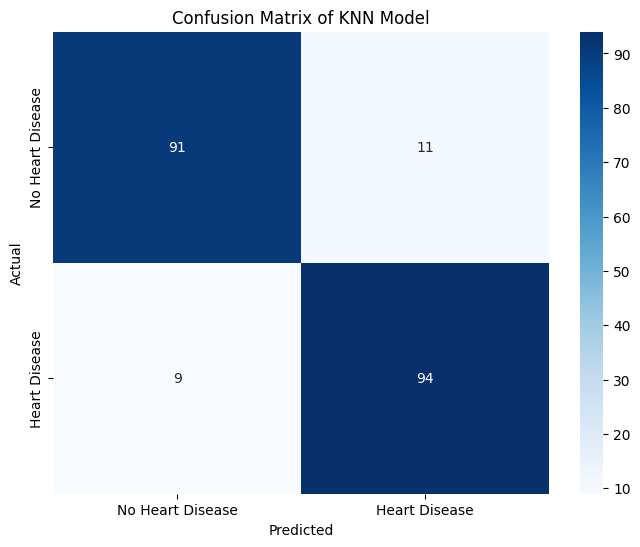

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')
plt.show()

## Iterative Refinement Using Grid Search

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 0.9731707317073169
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


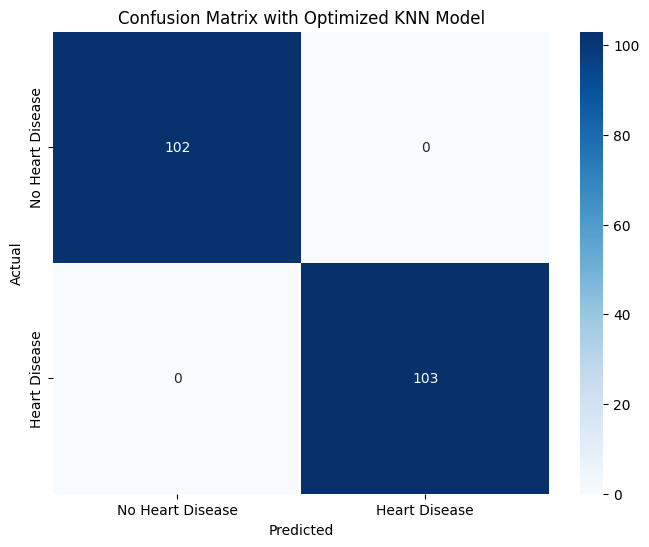

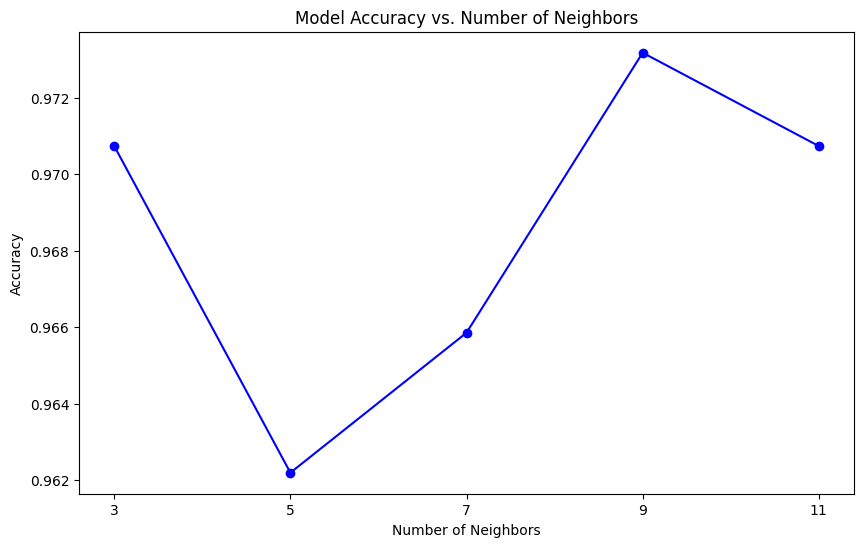

In [14]:

# Define the model and parameters
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Testing different values for k
    'weights': ['uniform', 'distance'],  # Uniform or distance weighted
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Setup the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model using the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Output evaluation metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Optimized KNN Model')
plt.show()

# Filter the results for plotting
best_weights = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']
mask = (grid_search.cv_results_['param_weights'] == best_weights) & \
       (grid_search.cv_results_['param_metric'] == best_metric)
filtered_scores = np.array(grid_search.cv_results_['mean_test_score'])[mask]
filtered_neighbors = np.array([d['n_neighbors'] for d in grid_search.cv_results_['params']])[mask]

# Sort the scores by 'n_neighbors'
sorted_indices = np.argsort(filtered_neighbors)
sorted_scores = filtered_scores[sorted_indices]
sorted_neighbors = filtered_neighbors[sorted_indices]

# Plot the accuracy for each 'n_neighbors'
plt.figure(figsize=(10, 6))
plt.plot(sorted_neighbors, sorted_scores, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(sorted_neighbors)  
plt.show()

## Checking for overfitting

CV Mean: 0.9970873786407767
CV Standard Deviation: 0.0087378640776699


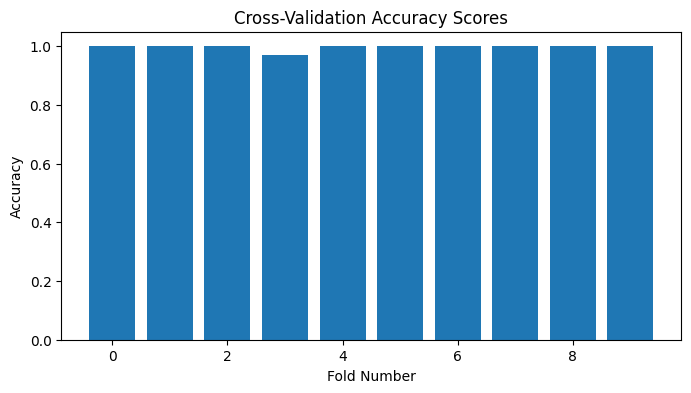

In [15]:
from sklearn.model_selection import cross_val_score

# best model from gridsearch
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

# perform 10-fold cross-validation
cv_scores = cross_val_score(best_knn, X, y, cv=10, scoring='accuracy')

# output the mean and standard deviation of the cross-validation scores
print("CV Mean:", cv_scores.mean())
print("CV Standard Deviation:", cv_scores.std())

# visualize cross-validation score distribution
plt.figure(figsize=(8, 4))
plt.title('Cross-Validation Accuracy Scores')
plt.bar(range(len(cv_scores)), cv_scores)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.show()
